In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

import re
import os
import string
import operator
from itertools import islice
from collections import Counter

from datetime import date
import matplotlib.dates as dates

from nltk import ngrams
import nltk as nltk
from nltk.corpus import stopwords

In [4]:
sns.set_style('darkgrid')
sns.set_context('paper')
pd.set_option('display.max_colwidth', None)

In [5]:
punct_signs = list(string.punctuation)
punct_signs.append('…')
punct_signs.append('¿')
punct_signs.append('•')
punct_signs.append('”')
punct_signs.append('“')
punct_signs.append('–')
punct_signs.remove('&')
punct_signs.append('∑')

stop_words = stopwords.words('english') + ['also', 'could', ]

In [6]:
df = pd.read_csv('data/courses.csv')
df.columns

Index(['ID', 'Country', 'Univeristy', 'G2RWorldRank', 'G2RNationalRank',
       'QSWorldUniversityRanking2021', 'Program',
       'SchoolOfferingCourseProgram', 'CourseDescription', 'Course Unit',
       'CourseUnitGoals', 'CourseUnitOutcomes'],
      dtype='object')

In [7]:
import math
def clean_text(text):
    for p in punct_signs:
        text = text.replace(p, ' ')
    clean_text = text.lower().split()
    clean_text = [w for w in clean_text if w not in stop_words]
    return clean_text

def get_course_stats(df_, idx):
    text =  ' '.join([ df.at[idx,'CourseDescription'],  df.at[idx,'CourseUnitGoals'] ,  df.at[idx,'CourseUnitOutcomes']])
    words_count = len(clean_text(text))
    
    description_words_count = len(clean_text(df_['CourseDescription'][idx]))
    goals_words_count = len(clean_text(df_['CourseUnitGoals'][idx]))
    outcomes_words_count = len(clean_text(df_['CourseUnitOutcomes'][idx]))
    
    lexical_diversity = len(set(text))/len(text) * 100
    
    stats = [words_count, lexical_diversity,
             description_words_count,
             goals_words_count, 
             outcomes_words_count]

    return stats

## Courses stats (Esto no creo que sea muy relevante pero igual te lo dejo )

In [8]:
df = df.fillna("")

In [9]:

column_names = ['words_count','lexical_diversity', 'description_words_count', 
           'goals_words_count', 'outcomes_word_count']
new_df = pd.DataFrame(columns = column_names)
for i in range(len(df)):
    new_df.loc[i] = get_course_stats(df[i:i+1], i)
new_df.head()


,words_count,lexical_diversity,description_words_count,goals_words_count,outcomes_word_count
0,145.0,2.274087,0.0,45.0,100.0
1,73.0,6.306306,73.0,0.0,0.0
2,68.0,3.864169,68.0,0.0,0.0
3,68.0,3.864169,68.0,0.0,0.0
4,81.0,3.430353,81.0,0.0,0.0


## Distribution of word count

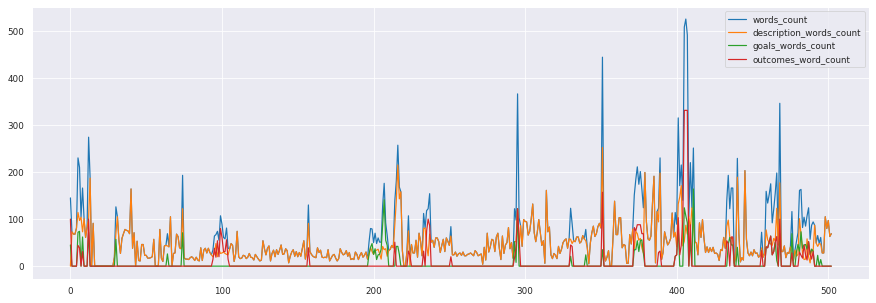

In [10]:
ax = new_df[['words_count', 'description_words_count', 'goals_words_count', 'outcomes_word_count']].plot(figsize=(15,5))

In [11]:
new_df = new_df.reset_index()
new_df.head()

,index,words_count,lexical_diversity,description_words_count,goals_words_count,outcomes_word_count
0,0,145.0,2.274087,0.0,45.0,100.0
1,1,73.0,6.306306,73.0,0.0,0.0
2,2,68.0,3.864169,68.0,0.0,0.0
3,3,68.0,3.864169,68.0,0.0,0.0
4,4,81.0,3.430353,81.0,0.0,0.0


In [12]:
stats_dist_df = pd.DataFrame()
stats_dist_df['Mean'] = new_df.mean().round(2)
stats_dist_df['Max'] = new_df.max().astype(int)
stats_dist_df['Min'] = new_df.min().astype(int)
stats_dist_df['Total'] = new_df.sum().astype(int)
stats_dist_df.drop(['index'], axis = 0)

,Mean,Max,Min,Total
words_count,62.49,525,0,31430
lexical_diversity,9.85,51,0,4956
description_words_count,45.90,252,0,23087
goals_words_count,7.21,164,0,3627
outcomes_word_count,9.38,331,0,4716


## 50 most frequently used ngrams in all documents

In [13]:
#m is the number of top ngrams.
def getNGrams(text, n, m):
    h_dict = {}   
    ngramas = list(ngrams(text, n))
    for grams in ngramas:
        words = ' '.join(grams).strip()
        if words not in h_dict:
            h_dict[words] = 0
        h_dict[words] = h_dict[words] + 1
        
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    top_values = list(islice(sorted_dict, m))
    return [(r[0], r[1], round(r[1]/len(ngramas)*100,2)) for r in top_values]

def printNgrams(data, m):
    Ngrams = []
    unigrams = getNGrams(data, 1, m)
    bigrams = getNGrams(data, 2 , m)
    trigrams = getNGrams(data, 3 , m)
    for i in range(0,m):
        Ngrams.append(unigrams[i] + bigrams[i] + trigrams[i])
    df = pd.DataFrame(Ngrams, columns=['Unigrams', 'Absolute Freq', 'Relative Freq', 
                                       'Bigrams', 'Absolute Freq', 'Relative Freq', 
                                       'Trigrams', 'Absolute Freq', 'Relative Freq',]) 
    return df

In [14]:
data = ' '.join(list(df['CourseDescription']) + list(df['CourseUnitGoals']) + list(df['CourseUnitOutcomes']))
data  = clean_text(data)

In [15]:
dfNgrams = printNgrams(data, 50)
dfNgrams

,Unigrams,Absolute Freq,Relative Freq,Bigrams,Absolute Freq,Relative Freq,Trigrams,Absolute Freq,Relative Freq
0,data,469,1.49,machine learning,110,0.35,artificial intelligence ai,15,0.05
1,students,360,1.15,science technology,82,0.26,electrical computer engineering,14,0.04
2,course,354,1.13,artificial intelligence,76,0.24,science technology studies,12,0.04
3,science,312,0.99,computer science,75,0.24,human computer interaction,12,0.04
4,technology,302,0.96,data science,53,0.17,identify formulate solve,12,0.04
5,social,277,0.88,healthcare data,48,0.15,human centered design,10,0.03
6,engineering,269,0.86,topics include,47,0.15,ai machine learning,10,0.03
7,design,244,0.78,security privacy,42,0.13,science technology society,9,0.03
8,ethical,224,0.71,case studies,41,0.13,large scale data,9,0.03
9,systems,218,0.69,computer engineering,37,0.12,machine learning models,9,0.03


## 30 Most used verbs, nouns and adjectives in all courses

In [16]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet');

[nltk_data] Downloading package punkt to /home/yadira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yadira/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/yadira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
#m is the number of top ngrams.
def getNPartsOfSpeech(text, m, tag):
    h_dict = {}   
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    #lemmatization and filtering allowed tags
    filtered_tags = [wordnet_lemmatizer.lemmatize(pt[0], pos="v") for pt in pos_tags if pt[1].startswith(tag)]
    
    for ft in filtered_tags:    
        if ft not in h_dict:
            h_dict[ft] = 0
        h_dict[ft] += 1
        
    sorted_dict = sorted(h_dict.items(), key=operator.itemgetter(1), reverse=True)
    top_values = list(islice(sorted_dict, m))
    return [(r[0], r[1], round(r[1]/len(filtered_tags)*100,2)) for r in top_values]

def printNPOS(data, m):
    postags = []
    
    verbs = getNPartsOfSpeech(data, m, 'V')
    verbs += [(None, None)] * (m - len(verbs))
    
    adjs = getNPartsOfSpeech(data, m , 'J')
    adjs +=[(None, None)] * (m - len(adjs))
    
    nouns = getNPartsOfSpeech(data, m , 'N')
    nouns +=[(None, None)] * (m - len(nouns))
    
    for i in range(0,m):
        if all(verbs[i]) or all(adj[i]) or all(nouns[i]):
            postags.append(verbs[i] + adjs[i] + nouns[i])
    df = pd.DataFrame(postags, columns=['Verbs', 'Absolute Freq', 'Relative Freq', 
                                       'Adjectives', 'Absolute Freq', 'Relative Freq',
                                        'Nouns', 'Absolute Freq', 'Relative Freq' ]) 
    return df

In [24]:
data = ' '.join(list(df['CourseDescription']) + list(df['CourseUnitGoals']) + list(df['CourseUnitOutcomes']))

In [25]:
printNPOS(data, 30)

,Verbs,Absolute Freq,Relative Freq,Adjectives,Absolute Freq,Relative Freq,Nouns,Absolute Freq,Relative Freq
0,be,772,13.10,social,265,4.29,data,377,2.02
1,include,220,3.73,ethical,210,3.40,course,371,1.99
2,have,158,2.68,such,111,1.80,technology,268,1.44
3,use,143,2.43,human,96,1.55,science,259,1.39
4,provide,107,1.82,public,82,1.33,engineer,258,1.38
5,learn,100,1.70,societal,78,1.26,students,248,1.33
6,apply,93,1.58,professional,76,1.23,design,205,1.10
7,understand,86,1.46,new,71,1.15,systems,198,1.06
8,develop,82,1.39,artificial,69,1.12,issue,196,1.05
9,relate,67,1.14,global,66,1.07,computer,172,0.92
